<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-изучению-данных" data-toc-modified-id="Вывод-по-изучению-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод по изучению данных</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-умножению-матриц:" data-toc-modified-id="Вывод-по-умножению-матриц:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод по умножению матриц:</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [14]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt # импорт библиотеки matplotlib
plt.style.use('seaborn-pastel')
import seaborn as sns

In [15]:
data = pd.read_csv('/datasets/insurance.csv')
data.head(15)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [17]:
# Переименую столбцы
data.columns = ['gender', 'age', 'salary', 'family_members', 'insurance_payments']
data

,gender,age,salary,family_members,insurance_payments
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [18]:
#Изменю тип данных в столбцах age и salary
data['age'] = data['age'].astype('int64')
data['salary']= data['salary'].astype('int64')

In [19]:
print('Дубликаты:',data.duplicated().sum())

Дубликаты: 153


In [20]:
# Избавлюсь от 153 дубликатов
data = data.drop_duplicates().reset_index(drop=True)

In [21]:
print('Дубликаты:',data.duplicated().sum())

Дубликаты: 0


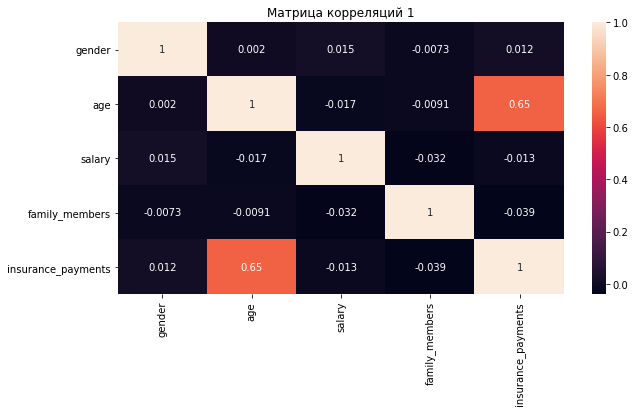

In [22]:
plt.figure(figsize=(10, 5))
plt.title('Матрица корреляций 1')
sns.heatmap(data.corr(), annot = True)
plt.show()

### Вывод по изучению данных

- столбцы переименовы. Названия изменены на латиницу, с нижним подчёркиванием
- в столбцах `age` и `salary` был изменён тип данных на `int64`
- были удалены `153` явных дубликата

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Не изменится

**Обоснование:** 
Признаки умножаются на обратимую матрицу $P$. Формула обучения примет вид:    

$$ w' = ((XP)^T XP)^{-1} (XP)^T y $$

Раскрываем скобки:  
$$ w' = ((P^TX^T XP)^{-1} P^TX^T y $$  

Заключим $X^T X $ в скобки и раскроем внешние:

$$ w' = P^{-1}(X^T X)^{-1}(P^T)^{-1} P^TX^T y $$

Т.к.:  

$$ (P^T)^{-1} P^T = (P^{-1} P)^T = E^T = E $$ 

То уравнение принимает вид:  

$$ w' = P^{-1}(X^T X)^{-1}X^T y $$

Подставляем $w$ в $w'$ :

$$ w' = P^{-1}w $$

Предсказания $a'$:

$$ a' = XPw' $$

Подставляем $w'$:

$$ a' = XPP^{-1}w $$

При перемножении $PP^{-1}$ получается еденичная матрица:
$$ a' = XEw $$

Из этого:

$$ a' = Xw = a $$



### Вывод по умножению матриц:  

При перемножении признаков на обратимую матрицу, предсказания не изменяются

## Алгоритм преобразования

**Алгоритм**

1. Разделить данные на features и target.
2. Создать рандомизированную квадратную матрицу, ширина которой будет равняться количеству признаков.
3. Проверить матрицу на обратимость. Если необратима, то изменить признаки раномизации
4. Создать зашифрованную таблицу, преобразовав признаки, с помощью умножения их на матрицу
5. Разделить датасеты на тестовую и тренеровочную выборки
6. Сравнить метрики, если равны, задача выполнена.

**Обоснование**

Ранее, с помощью уравнений, было выяснено, что при умножении исходной матрицы на случайную, предсказания $a$ и $a'$ равны. Из этого следует, что метрики качества равны.

## Проверка алгоритма

In [46]:
#Создадим функцию, которая будет преобразовывать данные, умножая их на случайную матрицу  
def encode(data, randomstate = 12345, randint = 745):
    try:
        # Создаём случайность
        rand = np.random.RandomState(randomstate)

        # Создади матрицу, разброс значений у которой от 0 до randint

        P = rand.randint(randint, size=(data.shape[1], data.shape[1]))

        # Проверка на обратимость
        P_rev = np.linalg.inv(P)
        
        # Если прошло успешно, умножаем таблицу на матрицу
        encoded_data = np.dot(data, P)
        encoded_data = pd.DataFrame(encoded_data, columns=data.columns)
        
        return encoded_data, P_rev
    
    except:
        print('Матрица необратима, выберите другое значение параметра randint')

In [47]:
# разделяем выборку на features и target

features = data.drop('insurance_payments', axis = 1)
target = data['insurance_payments']


In [48]:
features

,gender,age,salary,family_members
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0
...,...,...,...,...
4842,0,28,35700,2
4843,0,34,52400,1
4844,0,20,33900,2
4845,1,22,32700,3


In [49]:
features_encoded, encode_matrix = encode(features)

features_encoded

,gender,age,salary,family_members
0,27099617,26852164,5868852,18317257
1,20767635,20578204,4501677,14038513
2,11478180,11373325,2489078,7759353
3,22777650,22569933,4928832,15394979
4,14262842,14132485,3090781,9641025
...,...,...,...,...
4842,19504590,19326908,4223506,13183478
4843,28624995,28363504,6196293,19347829
4844,18518430,18349708,4008050,12516422
4845,17864867,17702497,3867604,12074556


In [56]:
encode_matrix

array([[ 4.14357272e-03, -2.94574849e-03,  2.11947510e-03,
        -2.91181298e-03],
       [-1.59424156e-03,  6.16703825e-04, -7.65235029e-04,
         2.94357826e-03],
       [ 1.08884250e-03,  2.76969669e-03, -3.03678100e-03,
        -9.52770382e-05],
       [-4.14197679e-03,  2.56888265e-03,  1.66693470e-03,
         2.33515947e-05]])

Проведём сравнение качества моделей с до и после преобразования

Исходный датасет

In [14]:
# Разделяю выборки на тренировочные и тестовые
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size=0.2,random_state=12345)
# Создаю модель линейной регрессии и обучаю её    
model = LinearRegression()
model.fit(features_train, target_train)

# Предсказания на тренировочной и тестовой выборках
predicted_train = model.predict(features_train)
predicted_test = model.predict(features_test)

# f2 оценки на тренировочных и тестовых выборках
f2_score_train = r2_score(target_train, predicted_train)
f2_score_test = r2_score(target_test, predicted_test)

print(f'R2 на тренировочной выборке: {round(f2_score_train, 4)}')
print(f'R2 на тестовой выборке: {round(f2_score_test, 4)}')

R2 на тренировочной выборке: 0.4333
R2 на тестовой выборке: 0.4161


Зашифрованный

In [15]:
# Разделяю выборки на тренировочные и тестовые
features_train, features_test, target_train, target_test = train_test_split(features_encoded,target,test_size=0.2,random_state=12345)
# Создаю модель линейной регрессии и обучаю её    
model = LinearRegression()
model.fit(features_train, target_train)

# Предсказания на тренировочной и тестовой выборках
predicted_train = model.predict(features_train)
predicted_test = model.predict(features_test)

# f2 оценки на тренировочных и тестовых выборках
f2_score_train = r2_score(target_train, predicted_train)
f2_score_test = r2_score(target_test, predicted_test)

print(f'R2 на тренировочной выборке: {round(f2_score_train, 4)}')
print(f'R2 на тестовой выборке: {round(f2_score_test, 4)}')

R2 на тренировочной выборке: 0.4333
R2 на тестовой выборке: 0.4161


## Общий вывод

- Во время изучения данных были обнаружены и удалены явные дубликаты
- С помощью уравнений было доказано, что при умножении исходных данных на обратимую матрицу, качество модели не измеится
- Была проведена проверка алгоритма шифрования данных клиентво, в ходе проверки метрика `R2`, после преобразования сталась неизменной